Homework 2: Traffic equation - Bryssinck Paul & de Becker Alexandre

Le but de ce travail est d'analyser le trafic d'une route de 11 km. On va donc y étudier la densité de voiture au court du temps avec deux situations initiales différentes. Pour cela on va discrétiser des équations différentielles à deux variables, correspondant à la dimension temporelle et la dimension spaciale.

Avant tout, commençons par préparer tout les outils dont nous aurons besoin.

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from IPython.display import HTML

Nous introduisons les conditions initiales qui seront identiques pour les deux situations que nous allons étudier.

In [2]:
L=11
rhomax=250.
nx=51
dx = L/(nx-1)
dt=0.001
 

où L correspond à la longueur de l'autoroute en km, rhomax à la densité maximale qu'il est possible d'avoir, nx le nombre de segment en lesquels nous coupons l'autoroute, dx le pas de distance que nous utiliserons et que nous avons déterminé à partir de nx, et dt est le pas de temps utilisé en heure.  

Nous avons une première fonction qui nous permet de relier le flux de voiture en un point de l'autoroute et la densité du trafic en ce point.

In [3]:
def F(rhog):
    F=Vmax*rhog*(1-rhog/rhomax)
    return F
    

PARTIE A

Les conditions générales étant posées, nous pouvons à présent introduire les conditions spécifiques au cas A. Dans ce cas nous limitons la vitesse à 80km/h et la densité initiale est donnée par rho0 (nous avons une densité de 10 voitures par km partout sauf entre le 11e et 21e segment où nous auront une densité de 50 voitures par km). La variable x est notre autoroute partionnée et servira pour le graphique.

In [4]:
Vmax=80.                           

x = numpy.linspace(0,L,nx)          
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50                    



Nous fixons nt à 100 afin d'avoir un temps suffisant pour pouvoir résoudre l'entièreté du problème.

In [5]:
nt=100

Nous utilisons à présent la méthode utilisée pour trouver la densité tout du long de l'autoroute en tout temps. On commence par l'équation de départ donnée par:

$$ \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

$$ \frac{\partial \rho}{\partial t} = - \frac{\partial F}{\partial x}$$

Réécrivons cela sous la forme de forward-difference pour le temps et backward-difference pour l'epace.

$$\frac{\rho^{n+1}_i-\rho^n_i}{\Delta t}=\frac{F^n_{i-1}-F^n_i}{\Delta x}$$

$$\rho^{n+1}_i=\Delta t (\frac{F^n_{i-1}-F^n_i}{\Delta x})+\rho^n_i$$

In [6]:
rho=rho0.copy()
print('la vitesse minimale a t=0 minutes est:', Vmax*(1-rho[10]/rhomax)*10/36,'m/s')
for n in range(nt):
    rhoc = rho.copy()
    rho[1:]=dt/dx*(F(rhoc[0:-1])-F(rhoc[1:]))+rhoc[1:]
    if n==49:
        print('la vitesse moyenne a t=3 minutes est:',numpy.average(F(rho)/rho*10/36),'m/s')
    if n==99:
        print('la vitesse minimale a t=6 minutes est:',numpy.min(F(rho)/rho*10/36),'m/s')


la vitesse minimale a t=0 minutes est: 17.7777777778 m/s
la vitesse moyenne a t=3 minutes est: 20.6361661961 m/s
la vitesse minimale a t=6 minutes est: 18.7847168709 m/s


Chauqe itération de la boucle correspont à un moment et pour chaque moment nous calulons la densité sur tout le tronçon à partir de l'équation calculée plus haut. Nous commençons par le second tronçons car les conditions initiales nous imposent une densité constant à 10 pour le premier pas spatial en tout temps. Nous mettons les conditions n=49 et n=99 car celles-ci correspondent respectivement au instants 3 minutes et 6 minutes. (Et non 50 et 100 car l'indexation de listes commencent à 0 et non à 1 sur python). Nous avons dû incorporé au code un "convertisseur" 10/36 afin d'obtenir nos résultats en m/s et non en km/h.

Afin de mieux visualiser nous pouvons lancer un graphique animé où nous verrons la densité de voiture en fonction de du lieux sur l'autoroute au cours du temps. Il faut d'abord créer un cadre, ce qui fait qu'on a un graphique blanc. Il faut également ne pas oublier de réinitialiser la densité afin de ne pas commencer avec notre densité finale. 

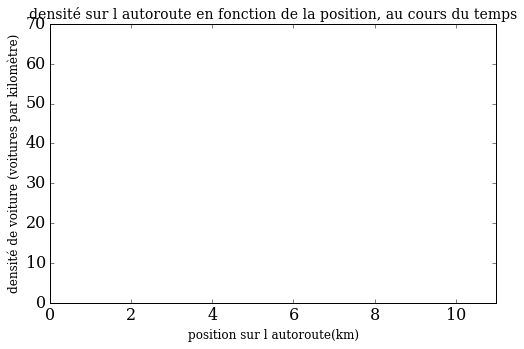

In [7]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,11), ylim=(0,70))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel(r'position sur l autoroute(km)', fontsize=12)
pyplot.ylabel(r'densité de voiture (voitures par kilomètre)', fontsize=12)
pyplot.title('densité sur l autoroute en fonction de la position, au cours du temps', fontsize=14)

(le fait que deux ' manquent pour "l'autoroute" est fait exprès sinon le code comprend cela comme la fin du texte)

In [8]:
rho=rho0.copy() #on ré-initialise rho

def diffusion(i):
    line.set_data(x,rho)
    
    rhoc = rho.copy()
    rho[1:]=dt/dx*(F(rhoc[0:-1])-F(rhoc[1:]))+rhoc[1:]
    
    
anim = animation.FuncAnimation(fig, diffusion,
                               frames=180, interval=60)
HTML(anim.to_html5_video())
    

PARTIE B

Pour la partie B, nous suivons la même procéduce avec pour seules différences les conditions initiales (densité de 20 là où elle en fallait 10 précédement) et la prise de données se passe à des temps différents.

In [9]:
Vmax=136.

x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 
rho0[10:20] = 50

In [10]:
nt=100

In [11]:
rho=rho0.copy()
print('la vitesse minimale a t=0 minutes est:', Vmax*(1-rho[10]/rhomax)*10/36,'m/s')
for n in range(nt):
    rhoc = rho.copy()
    rho[1:]=dt/dx*(F(rhoc[0:-1])-F(rhoc[1:]))+rhoc[1:]
    if n==49:
        print('la vitesse moyenne a t=3 minutes est:',numpy.average(F(rho)/rho*10/36),'m/s')
        print('la vitesse minimale a t=3 minutes est:',numpy.min(F(rho)/rho*10/36),'m/s')

la vitesse minimale a t=0 minutes est: 30.2222222222 m/s
la vitesse moyenne a t=3 minutes est: 33.872218191 m/s
la vitesse minimale a t=3 minutes est: 30.9864026806 m/s


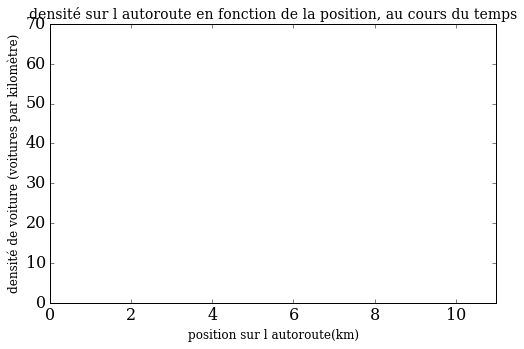

In [12]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,11), ylim=(0,70))
line = ax.plot([], [], color='#803366', ls='--', lw=3)[0]
pyplot.xlabel(r'position sur l autoroute(km)', fontsize=12)
pyplot.ylabel(r'densité de voiture (voitures par kilomètre)', fontsize=12)
pyplot.title('densité sur l autoroute en fonction de la position, au cours du temps', fontsize=14)

In [13]:
rho=rho0.copy() #on ré-initialise rho

def diffusion(i):
    line.set_data(x,rho)
    
    rhoc = rho.copy()
    rho[1:]=dt/dx*(F(rhoc[0:-1])-F(rhoc[1:]))+rhoc[1:]
    
    
anim = animation.FuncAnimation(fig, diffusion,
                               frames=120, interval=60)
HTML(anim.to_html5_video())
    

Pour conclure, nous voyons que l'animation représentant la densité sur l'autoroute au cours du temps, nous montre bien ce à quoi nous nous attendions. Le bouchon se déplace vers l'avant et a tendance à se dissiper.